In [2]:
import pandas as pd
df=pd.read_csv('http://203.247.53.31/2015_Fall/D4BE/cereal.csv')
print(df.columns,'\n',df.shape)

Index(['Group', 'Spend'], dtype='object') 
 (1250, 2)


##비율추론

In [3]:
phat = df.Group.value_counts()/1250
print('다이어트효과 이유 구입 비율 = %.1f%%이다.' %(phat[2]*100))

다이어트효과 이유 구입 비율 = 38.7%이다.


>올해 다이어트 효과 이유로 구입한 비율은 38.7%이다.
>

#모비율 가설검정

>귀무가설 : 올해 다이어트 효과 이유로 구매하는 비율은 35%이다.

>대립가설  : 올해 다이어트 효과 이유로 구매하는 비율은 35%보다 증가했다.

In [4]:
import statsmodels.stats.proportion as smp
ts,p=smp.proportions_ztest(484,1250,0.35,alternative='larger') #다이어트 이유, 사람수 퍼센트, 이상
print('phat=%.3f, 검정통계량=%.3f, 유의확률=%.4f'%(phat[2],ts,p))

phat=0.387, 검정통계량=2.700, 유의확률=0.0035


>결론 : 귀무가설 기각, 작년에 비해서 올해 다이어트 효과 이유로 구매한 비율은 증가하였다.

##평균추론

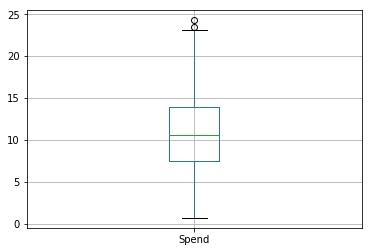

In [5]:
df.boxplot('Spend')

In [6]:
Q1 = df.Spend.quantile(0.25)
Q3 = df.Spend.quantile(0.75)
IQR = Q1-Q3
UI = df.Spend.quantile(0.75)+1.5*(df.Spend.quantile(0.75)-df.Spend.quantile(0.25))
df0 = df[df.Spend < UI]
df.shape

(1250, 2)

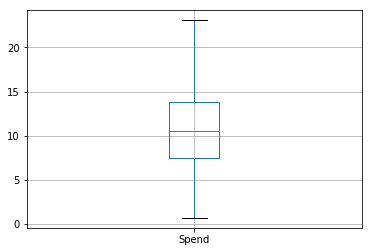

In [7]:
df0.boxplot('Spend')

In [8]:
print('올해 지출 평균 추정치 = %.3f' % df0.Spend.mean()) # 올해 구입 평균액(이상치 제거된) **%다음 '.'까먹지 말기!!

올해 지출 평균 추정치 = 10.786


#가설검정

>귀무가설 : 올해 아침식사 구입 비용은 $10.6이다.

>대립가설 : 올해 아침식사 구입 비용은 $10.6가 아니다. (양측검정)

In [9]:
from scipy import stats
stats.ttest_1samp(df0.Spend,10.6)

Ttest_1sampResult(statistic=1.520331948112864, pvalue=0.12868107155635078)

>결론 : 귀무가설 채택, 작년 구입 평균 비용과 달라지지 않았다. 올해 구입비용은 $10.87로 높아졌지만 통계적으로 유의하지 않다.

##두모집단 추론

소방차에 응급장비를 장착하는 문제에 대한 논쟁이 벌어져, (1) 콜센터 전화를 받고 소방차가 응급차보다 1분 먼저 도착하고 (2) 8분 이내 도착하는 비율이 소방차가 높다면 응급장비를 소방차에 장착하기로 시의회에서 결정하였다. (Cambridge, Waterloo, Kitchner) 3개 지역 중 장착 가능한 도시? 

In [10]:
import pandas as pd
am=pd.read_csv('http://wolfpack.hnu.ac.kr/2015_Fall/D4BE/ambulance.csv')
am.head(3)

,C Number,C Ambulance,C Fire,K Number,K Ambulance,K Fire,W Number,W Ambulance,W Fire
0,1.0,13.44,8.27,1,5.52,8.64,1.0,6.69,1.98
1,2.0,18.93,11.64,2,10.02,9.24,2.0,9.48,13.57
2,3.0,15.24,11.03,3,6.64,7.16,3.0,16.51,14.73


>연구문제 소방차에 응급장비 설치

>1. F>Am 1분 먼저도착
>2. 8분 이내 도착 비율 F>Am

>귀무가설 : 평균 도착 시간은 동일할 것이다. (F-1 = Am)

##모평균 추론

> 귀무가설 : 소방차 평균 도착시간+1분과 구급차 평균 도착시간은 같다.

> 대립가설 : 소방차 평균 도착시간+1분과 구급차 평균 도착시간보다 빠르다.

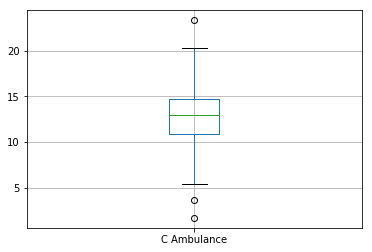

In [11]:
am.boxplot('C Ambulance')

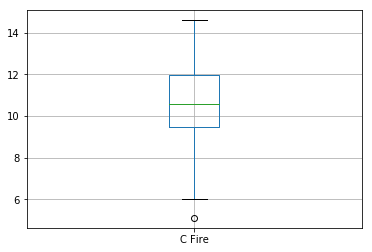

In [12]:
am.boxplot('C Fire')

>구급차 평균도착시간, 소방차 평균도착시간 추정

In [13]:
print('구급차 평균도착시간=%.2f, 소방차 평균도착시간=%.2f' %(am['C Ambulance'].mean(), am['C Fire'].mean()))

구급차 평균도착시간=12.86, 소방차 평균도착시간=10.64


분산 동질성 검정

In [0]:
am.dropna(inplace=True) #괄호 안을 꼭써줘야 바뀜

In [15]:
import scipy
from scipy import stats
scipy.stats.levene(am['C Ambulance'],am['C Fire'])

LeveneResult(statistic=29.92847341971677, pvalue=9.507440889962078e-08)

>유의확률 작으므로 귀무가설(등분산) 기각.

In [16]:
from scipy import stats
stats.ttest_ind(am['C Ambulance'],am['C Fire']+1,equal_var=False)

Ttest_indResult(statistic=3.6047711257507693, pvalue=0.0003805101716884837)

>결론 : 귀무가설 기각, 소방차에 응급장치를 설치해도 된다.

##모비율 차이 검정

>귀무가설 : 8분 이내에 도착하는 비율이 소방차와 구급차는 동일하다.

>대립가설 : 8분 이내에 도착하는 비율이 소방차가 구급차보다 높다.

In [17]:
import numpy as np
import statsmodels.api as sm
population1 = np.random.binomial(1,0.08666666666666667,150) #비율, 총수
population2 = np.random.binomial(1,0.07333333333333333,150) #random으로 강의 때 사용X
sm.stats.ttest_ind(population1, population2)

(1.0261596043349708, 0.3056485839812182, 298.0)

In [18]:
am['C Fire'].shape[0]
am[am['C Fire']<8].shape[0]/150

0.08666666666666667

In [0]:
p1hat = am[am['C Fire']<8].shape[0]/am['C Fire'].shape[0]
p2hat = am[am['C Ambulance']<8].shape[0]/am['C Ambulance'].shape[0]

In [20]:
import numpy as np
TS = (p1hat - p2hat)/np.sqrt(p1hat*(1-p1hat)/150+p2hat*(1-p2hat)/150)

from scipy.stats import norm
print('검정통계량 = %.2f 유의확률 = %.2f' %(TS, 1-norm.cdf(TS)))

검정통계량 = 0.43 유의확률 = 0.34


귀무가설 채택, 8분 이내 도착하는 비율은 동일하다.